In [20]:
import pandas as pd
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Loading the cleaned data after preprocessing.
df = pd.read_csv("C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/Cleaned_Loan_approval_dataset.csv")

In [23]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,UseOfLoan,...,ExpectedReturn,ProbabilityOfDefault,Rating,Restructured,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,TotalIncome,TotalLiabilities
0,Existing_credit_customer,Income_expenses_verified,1,53,Female,EE,2125.0,2125.0,20.97,Home_improvement,...,0.141145,0.122216,C,No,M,1000.0,1.0,500.0,354.0,499.09
1,Existing_credit_customer,Income_unverified,1,50,Female,EE,3000.0,3000.0,17.12,Business,...,0.140436,0.036400,B,No,M,1000.0,1.0,1800.0,900.0,740.45
2,New_credit_Customer,Income_expenses_verified,1,44,Male,EE,10630.0,9100.0,13.67,Business,...,0.113484,0.041300,A,No,M,1000.0,0.0,0.0,1200.0,915.00
3,New_credit_Customer,Income_verified,6,42,Male,ES,1500.0,1500.0,40.40,Home_improvement,...,0.183229,0.188726,F,No,M3,1000.0,0.0,0.0,863.0,351.00
4,New_credit_Customer,Income_expenses_verified,6,34,Female,ES,1595.0,1090.0,68.39,Other,...,0.115240,0.749511,HR,No,M5,1000.0,0.0,0.0,697.0,947.00


In [24]:
df.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'ExpectedReturn',
       'ProbabilityOfDefault', 'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'TotalIncome', 'TotalLiabilities'],
      dtype='object')

In [25]:
df['ExpectedReturn'].describe()

count    179235.000000
mean          0.130520
std           0.067156
min          -0.798891
25%           0.100773
50%           0.128518
75%           0.150562
max           0.808546
Name: ExpectedReturn, dtype: float64

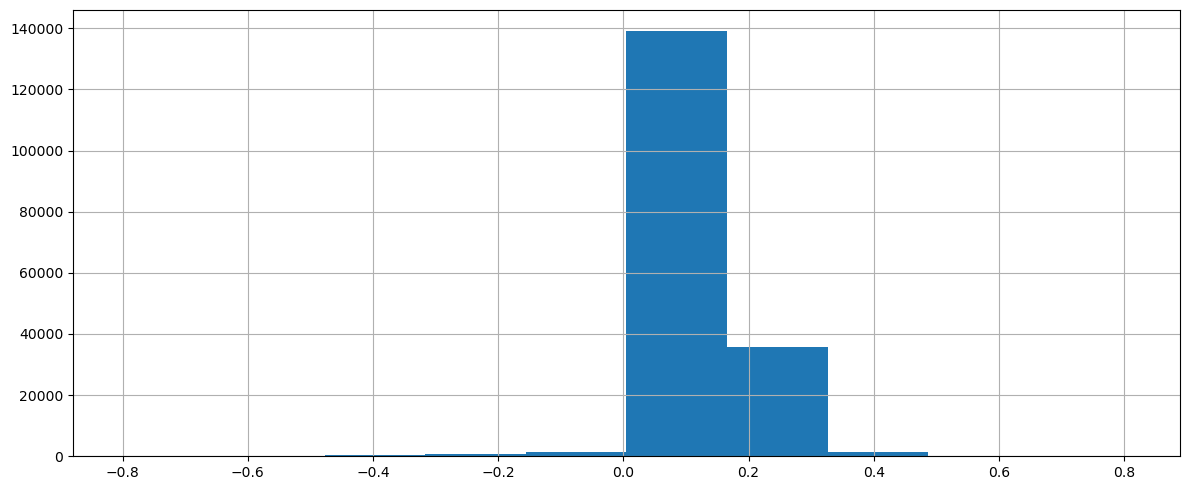

In [26]:
df['ExpectedReturn'].hist(figsize=(12, 5), bins=10)
plt.tight_layout()
plt.show()

In [27]:
# Selecting features for predicting probabilty of default.
exp_return_features = [
    'AppliedAmount', 'Amount','ProbabilityOfDefault',
    'UseOfLoan', 'TotalLiabilities','TotalIncome',
    'DebtToIncome', 'FreeCash', 'ExpectedReturn',
    'NewCreditCustomer', 'CreditScoreEsMicroL', 'CreditScoreEeMini',
    'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
    'Age', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'HomeOwnershipType',
    'Rating', 'Restructured'
]
exp_return_df= df[exp_return_features]
exp_return_df.head()

,AppliedAmount,Amount,ProbabilityOfDefault,UseOfLoan,TotalLiabilities,TotalIncome,DebtToIncome,FreeCash,ExpectedReturn,NewCreditCustomer,CreditScoreEsMicroL,CreditScoreEeMini,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,Age,EmploymentStatus,EmploymentDurationCurrentEmployer,HomeOwnershipType,Rating,Restructured
0,2125.0,2125.0,0.122216,Home_improvement,499.09,354.0,26.29,10.92,0.141145,Existing_credit_customer,M,1000.0,1.0,500.0,53,Retiree,Not-known,Owner,C,No
1,3000.0,3000.0,0.036400,Business,740.45,900.0,30.58,78.80,0.140436,Existing_credit_customer,M,1000.0,1.0,1800.0,50,Entrepreneur,MoreThan5Years,Owner,B,No
2,10630.0,9100.0,0.041300,Business,915.00,1200.0,26.71,349.43,0.113484,New_credit_Customer,M,1000.0,0.0,0.0,44,Entrepreneur,UpTo3Years,Mortgage,A,No
3,1500.0,1500.0,0.188726,Home_improvement,351.00,863.0,7.36,449.47,0.183229,New_credit_Customer,M3,1000.0,0.0,0.0,42,Fully-Employed,UpTo5Years,Living_with_parents,F,No
4,1595.0,1090.0,0.749511,Other,947.00,697.0,36.04,95.81,0.115240,New_credit_Customer,M5,1000.0,0.0,0.0,34,Retiree,Not-known,Tenant_pre_furnished_property,HR,No


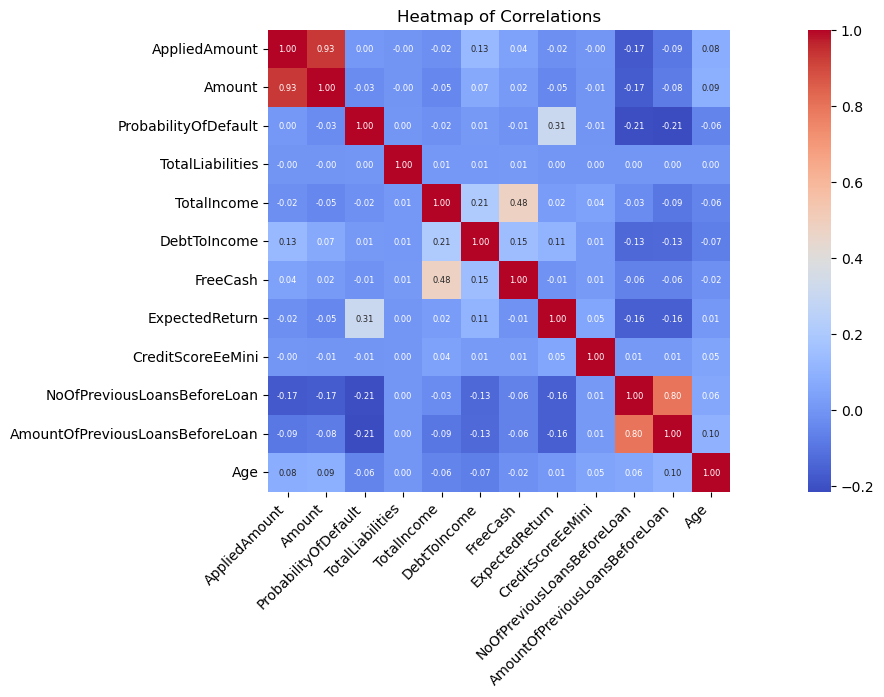

In [28]:
# Analysing the heatmap to find out relationships between the variables.

df1 = exp_return_df.select_dtypes(include=['number'])
# Calculating correlation matrix
correlation_matrix = df1.corr()

# Creating heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6},fmt=".2f", square=True)
plt.title('Heatmap of Correlations')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.show()

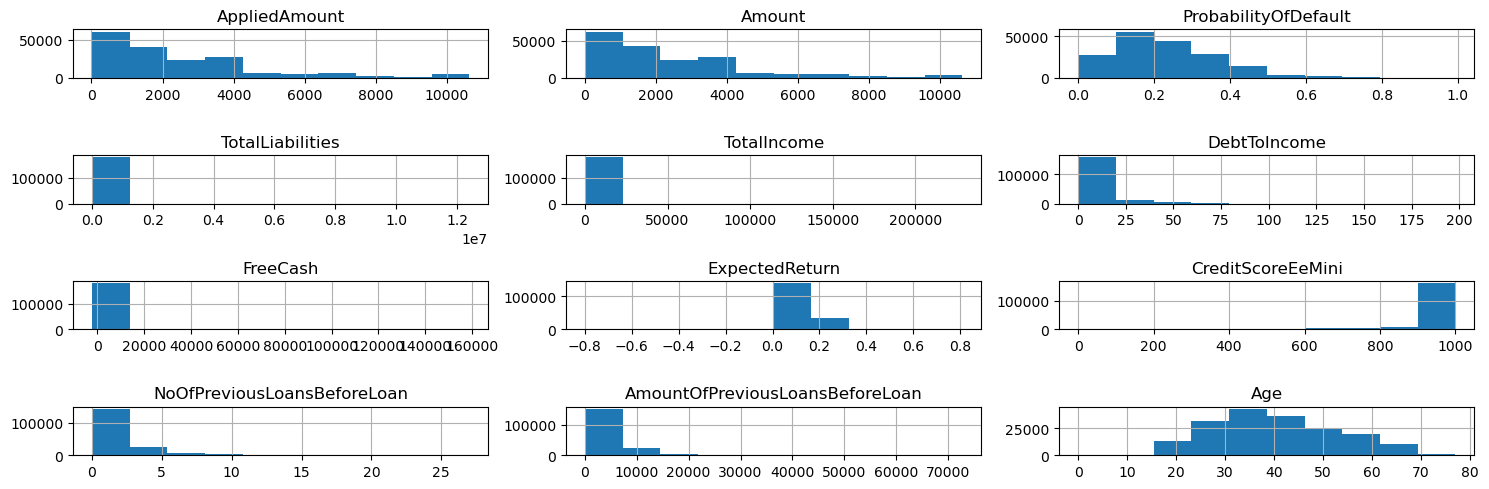

In [29]:
# Plotting histograms for all numerical variables to check the distribution of the variables.
df1.hist(figsize=(15, 5), bins=10)
plt.tight_layout()
plt.show()

In [30]:
# Performing label encoding to convert categorical variables into numeric values.
import joblib

label_encoder = joblib.load('C:/Users/KRISHNA/Desktop/SHWETA/Fall 2024/ENGR_5520G_G5/data_encoder.pkl')

# Getting the categorical columns.
categorical_columns = exp_return_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Loop through the categorical columns and apply LabelEncoder
for column in categorical_columns:
    exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3634556869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3634556869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = label_encoder.fit_transform(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3634556869.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

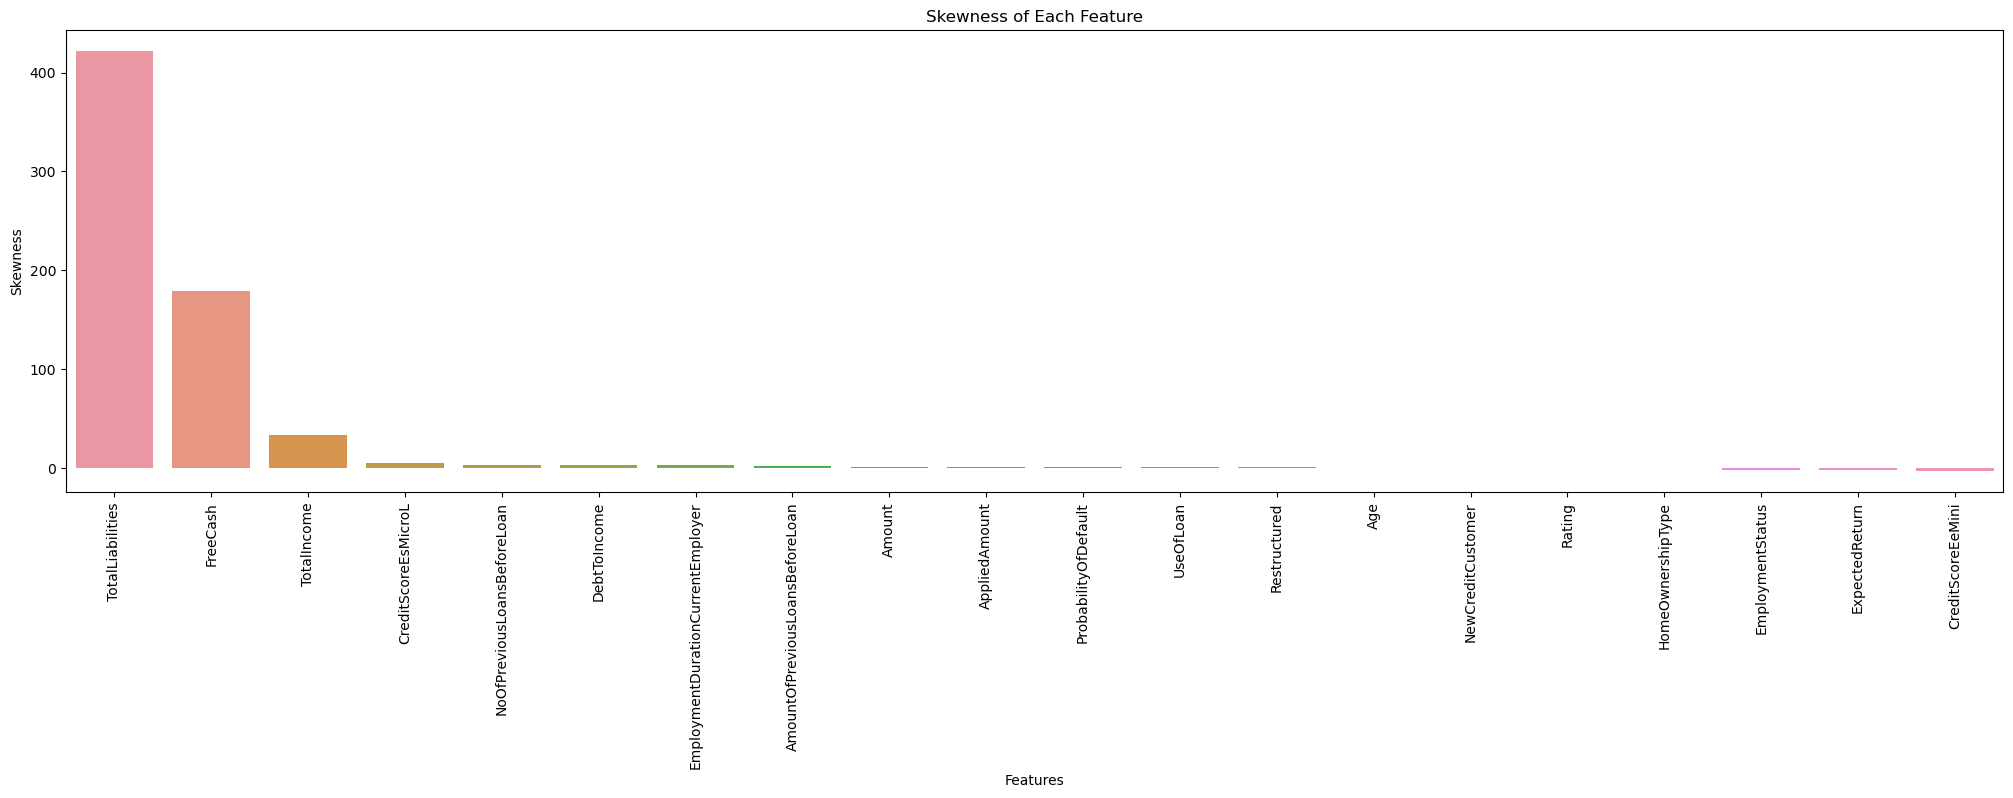

In [31]:
# Checking skewness of all the columns.
skewed_features = exp_return_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values
plt.figure(figsize=(25, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90) 
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [32]:
threshold = 2

# Selecting features to transform based on skewness
features_to_transform = skewed_features[skewed_features.abs() > threshold].index.tolist()

# Apply transformations
for column in features_to_transform:
    if skewed_features[column] > 0:
        if (exp_return_df[column] >= 0).all(): 
            exp_return_df[column] = np.log1p(exp_return_df[column])
        else:
            min_value = exp_return_df[column].min()
            exp_return_df[column] = exp_return_df[column] + abs(min_value) + 1 
            exp_return_df[column] = np.log1p(exp_return_df[column])

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3804148842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = np.log1p(exp_return_df[column])
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3804148842.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_return_df[column] = exp_return_df[column] + abs(min_value) + 1
C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_14112\3804148842.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [34]:
features_to_transform

['TotalLiabilities',
 'FreeCash',
 'TotalIncome',
 'CreditScoreEsMicroL',
 'NoOfPreviousLoansBeforeLoan',
 'DebtToIncome',
 'EmploymentDurationCurrentEmployer',
 'AmountOfPreviousLoansBeforeLoan',
 'ExpectedReturn',
 'CreditScoreEeMini']

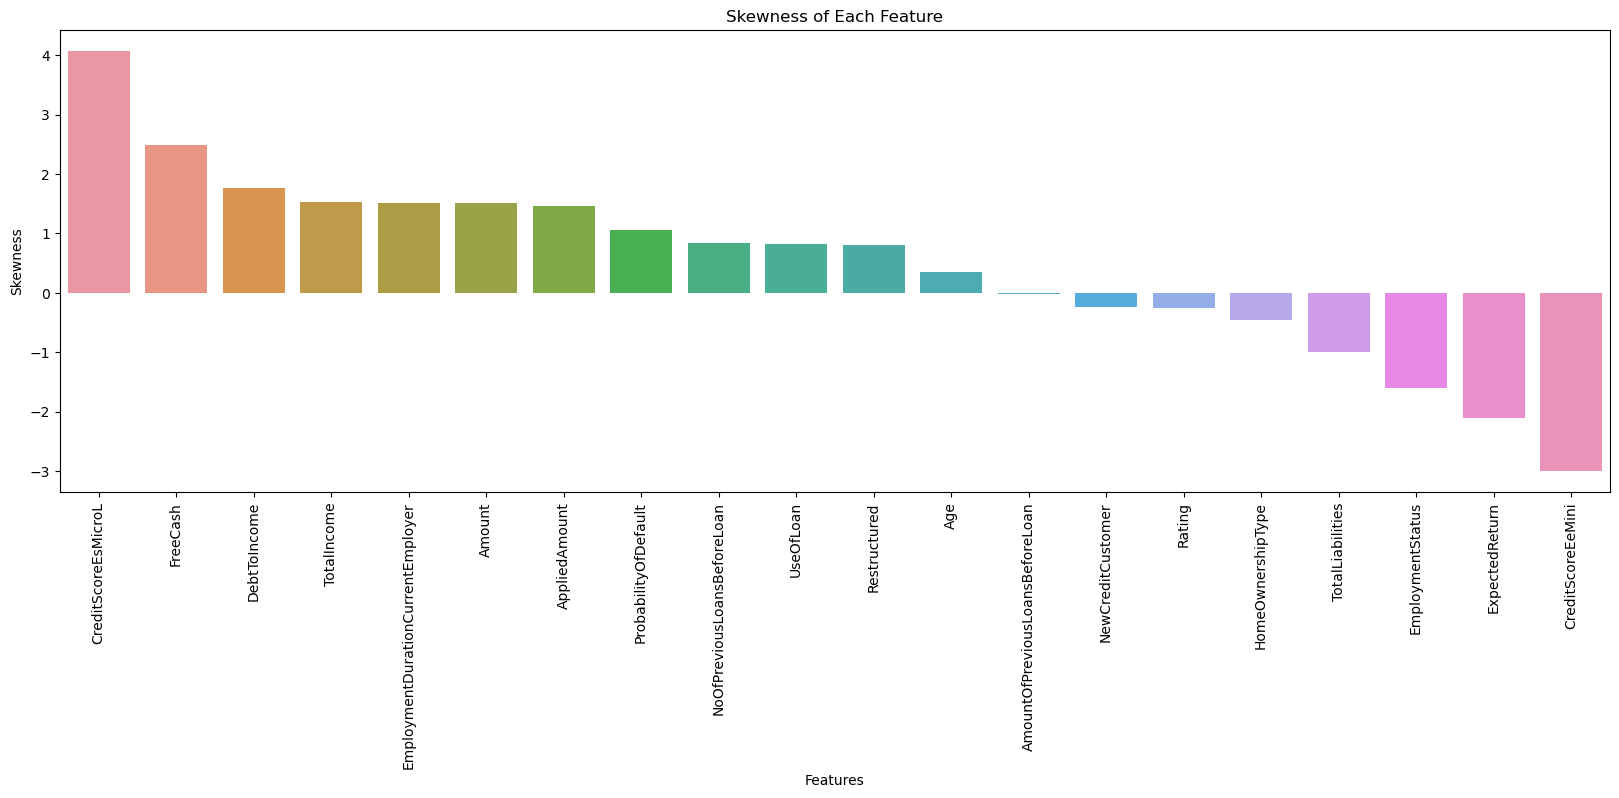

In [33]:
# Checking the skewness of each column after perfroming the transformations.
skewed_features = exp_return_df.apply(lambda x: x.skew()).sort_values(ascending=False)

# Plotting the skewness values.
plt.figure(figsize=(20, 6))
sns.barplot(x=skewed_features.index, y=skewed_features.values)
plt.xticks(rotation=90)  
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Features')
plt.show()

In [16]:
# Saving the data.
exp_return_df.to_csv('Cleaned_expected_return_dataset.csv', index=False)

In [17]:
# Performing normalization of data using Robust Scaler.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = exp_return_df[['ExpectedReturn']] 
y = scaler.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

C:\Users\KRISHNA\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
2,ProbabilityOfDefault,0.244467
17,Rating,0.206271
7,FreeCash,0.141552
9,CreditScoreEsMicroL,0.079210
1,Amount,0.076865
0,AppliedAmount,0.049357
6,DebtToIncome,0.038945
5,TotalIncome,0.034258
4,TotalLiabilities,0.033628
13,Age,0.021405


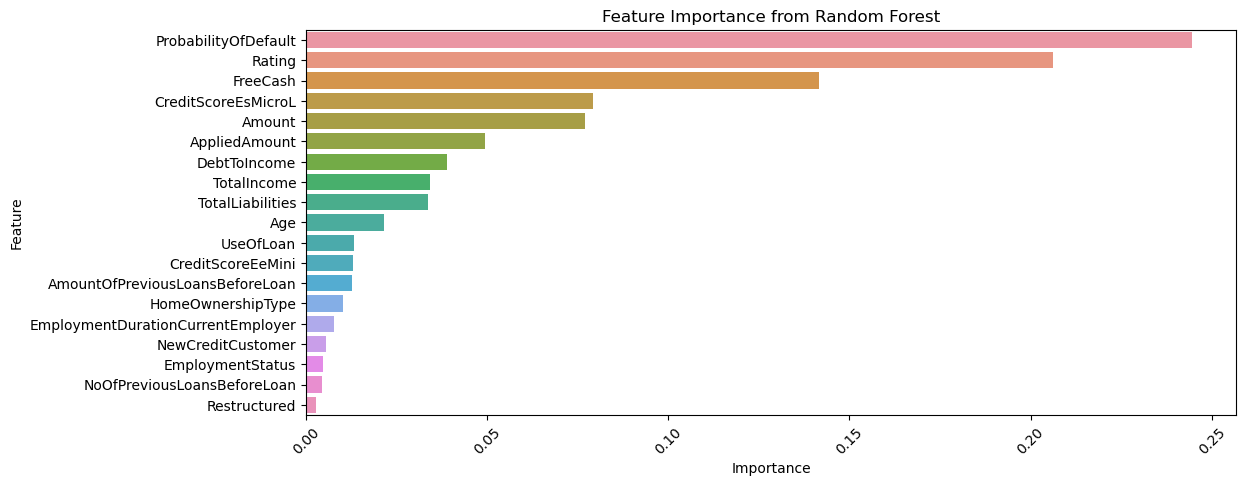

In [19]:
# Plotting the top 20 feature importances.
top_n = 20
top_features = feature_importance_df.head(top_n)
plt.figure(figsize=(12, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45) 
plt.show()